In [1]:
import nltk
import pandas as pd
import matplotlib as plt
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#genism
from gensim.parsing.preprocessing import remove_stopwords

from collections import OrderedDict

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import gensim


In [80]:
from warnings import filterwarnings
filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
data = pd.read_csv('reddit_data_one-year.csv')


In [82]:
#### make lowercase and remove punctuation

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['text'] = data.text.map(alphanumeric).map(punc_lower)

In [4]:
#create big corpus of english general words

a_file = open("stop_words_english.txt", "r")

corpus1 = [s.strip() for s in a_file.readlines()]

for line in a_file:
  stripped_line = line.strip()
  line_list = stripped_line.split()
  list_of_lists.append(line_list)

a_file.close()

a_file = open("google-10000-english-usa.txt", "r")

corpus2 = [s.strip() for s in a_file.readlines()]

a_file.close()

big_corpus = corpus1 + corpus2

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
stemmer = SnowballStemmer('english')


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
####create initial filter, apply stemming

filtered = []
for i in data.text:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if i not in corpus1:
            i = stemmer.stem(i)
            
            if i not in corpus2:
                post_filter.append(i)
    post_filter = ' '.join(post_filter)
    filtered.append(post_filter)
data['general_words_removed'] = filtered


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
drug_corpus_clean = ['amphetamine', 'clonazolam', 'dopamine', 'methylphenidate', 'bromazolam', 'triptamine', 'dmt', 'mxe', 'fxe', 'flubromazolam',
 'triazolam', 'flualprazolam', 'arylcyclohexylamine', 'acetone', 'chloride', 'etizolam', 'alprazolam',
 'dinotrogen', 'dpt', 'dck', 'bromazepam', 'lorazepam', 'trazodone', 'mirtazapine', 'ketamine', 'klonopin', 'propranolol',
 'fluclotizolam', 'diclazepam', 'norflurazepam', 'quetiapine', 'xan', 'hydrochloride', 'aplrazolam', 'phenethylamine', 'bretazenil', 'rilmazafone', 'pyrazolam', 'emoxypine', 'fasoracetam', 'mda', 'tyrosine', 'diazepam', 'phenylpiracetam', 'pvp', 'flunitrazolam', 'cyclazodone',
 'thc', 'dexamphetamine', 'benzene', 'piracetam', 'benzodiazepine', 'diazepine', 'tryptamine', 'diclaz',
 'metizolam', 'flubrotizolam', 'mescaline', 'hydroxytryptamine', 'dimethyltryptamine', 'clonazepam', 'clonzolam', 'doxylamine', 'diphenydramine',
 'ket', 'allylescaline', 'phenylethylamine', 'oxy', 'nitrazolam', 'clonozolam', 'dopamine',
 'etazene', 'methylamphetamine', 'phenidate', 'mth', 'dextroamphetamine', 'midazolam', 'methamphetamine',
 'fluoroamphetamine', 'ethyltryptamine', 'ethylamine', 'flouromethamphetamine', 'methoxetamine', 'cyclaz', 'zylofuramine', 'cypenamine', 'ephenidine', 'ketamine', 'flumazenil', 'xtc',
 'monoamine', 'methallylescaline', 'methallyescaline', 'propanolol', 'tapentadol', 'esketamine', 'sine', 'isopropylphenidate', 'ethylphenidate', 'diphenhydramine', 'metodesnitazene',
 'fluonitazene', 'tiletamine', 'flubromzolam', 'isotonitazene', 'proppranolol', 'racetam', 'desoxymethoxetamine', 'imidazenil',
 'isopropyphenidate', 'propylphenidate', 'fluoromethylphenidate', 'lisdexamphetamine', 'isoproscaline',
 'isopropoxyphenethylamine', 'mhp', 'lisdexamfetamine', 'flourodeschloroketamine', 'sulbutiamine', 'trpytamine', 'methiopropamine', 'methalyescaline',
 'flurazepam', 'olanzapine', 'dizocilpine', 'nimetazepam', 'methylenedioxymethamphetamine', 'etonitazene',
 'lormetazepam', 'flunitrazepam', 'dxe', 'temazepam', 'oxazepam', 'ephinidine', 'thiamine', 'tryosine', 'bromozolam', 'isopropylphenidine',
 'chloroephenidine', 'hydroxymetamine', 'pcm', 'methoxyketamine', 'norketamine', 'cyclopropylmescaline', 'dichloromescaline', 'dibromomescaline', 'hodgkinsine',
 'phenazepam', 'brotizolam', 'hearthstone', 'methallallylescaline', 'deoxymethoxetamine', 'zolam', 'methoxpropamine',
 'metilphenidate', 'deschloroketamine','itonitazene']

additional_drug_terms = ['opioid','tramadol','tramadol','dopamin','vyvans','oxycodon','dsmt','gabapentin','memantin','benzo',
                         'opiat','kpin','psilocybin','fdck','mxipr','hexen','redos','arylcyclohexylamin','odsmt','methadon','dipt',
                        'morphin','etazen','eutylon','suboxon','glycol','mxpr','dmxe','shroom','isom','amphetamin','methylphenid','mapb',
                        'kratom','ethyl','coke','adderall','etiz','meth','heroin','mdma','cannabinoid','benzos','phenibut','ethanol','cathinone',
                        'cathinon','gram','ketamin']

misc_terms = ['researchchem','wiki','https','subreddit','psychonautwiki','clam','pyro','adhd','doses','didn',
              'don','stims','reddit','doesn','woudln','don','taper','honestly','solut','experience','effect','experi',
             'minut','peopl','daili','pretti','sleep','question','reddit',]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
filtered2 = []
for i in data.general_words_removed:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if len(i) > 4 and i not in drug_corpus_clean and i not in additional_drug_terms:
            if i not in misc_terms:
                post_filter.append(i)
    post_filter = ' '.join(post_filter)
    filtered2.append(post_filter)  
data['drugsremoved'] = filtered2

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.7, #ignore terms that appear in more than X% of the document 
                                min_df = 4)  #ignore terms that appear in less than X documents
dtm_tf = tf_vectorizer.fit_transform(data.drugsremoved)
print(dtm_tf.shape)

(1031, 1156)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data.drugsremoved)
print(dtm_tfidf.shape)

(1031, 1156)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [11]:
### for TF DTM
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4, random_state=0)

In [12]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-11-11 15:38:39,299 : INFO : NumExpr defaulting to 8 threads.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  30.797467
3        1.782994 -295.079681       2        1  24.524671
2      220.811432 -343.832123       3        1  22.864464
0       50.533993  -76.050934       4        1  21.813398, topic_info=           Term        Freq       Total Category  logprob  loglift
1067      toler  228.000000  228.000000  Default  30.0000  30.0000
959       snort  177.000000  177.000000  Default  29.0000  29.0000
388    euphoria  188.000000  188.000000  Default  28.0000  28.0000
991      stimul  301.000000  301.000000  Default  27.0000  27.0000
13       addict  137.000000  137.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
11        activ   25.897200   91.925362   Topic4  -5.2633   0.2558
404   experienc   29.519457  158.266027   Topic4  -5.1324  -0.1566
222      couldn   25.366632   88.278433   Topic4  -5.2840   0.2756
183      combin   25.840969  101.810960   Topic4  -5.2655   0.1515
324         don   25.577804  163.187417   Topic4  -5.2757  -0.3305

[309 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         1  0.150787   absolut
2         2  0.439797   absolut
2         3  0.062828   absolut
2         4  0.339272   absolut
4         3  0.944103     abyss
...     ...       ...       ...
1150      1  0.056669    wouldn
1150      2  0.642243    wouldn
1150      3  0.170006    wouldn
1150      4  0.132227    wouldn
1155      2  0.883891  zopiclon

[545 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [13]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmds')


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.127583 -0.091708       1        1  30.797467
3     -0.070742  0.120931       2        1  24.524671
2      0.095723 -0.121191       3        1  22.864464
0      0.102602  0.091969       4        1  21.813398, topic_info=           Term        Freq       Total Category  logprob  loglift
1067      toler  228.000000  228.000000  Default  30.0000  30.0000
959       snort  177.000000  177.000000  Default  29.0000  29.0000
388    euphoria  188.000000  188.000000  Default  28.0000  28.0000
991      stimul  301.000000  301.000000  Default  27.0000  27.0000
13       addict  137.000000  137.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
11        activ   25.897200   91.925362   Topic4  -5.2633   0.2558
404   experienc   29.519457  158.266027   Topic4  -5.1324  -0.1566
222      couldn   25.366632   88.278433   Topic4  -5.2840   0.2756
183      combin   25.840969  101.810960   Topic4  -5.2655   0.1515
324         don   25.577804  163.187417   Topic4  -5.2757  -0.3305

[309 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         1  0.150787   absolut
2         2  0.439797   absolut
2         3  0.062828   absolut
2         4  0.339272   absolut
4         3  0.944103     abyss
...     ...       ...       ...
1150      1  0.056669    wouldn
1150      2  0.642243    wouldn
1150      3  0.170006    wouldn
1150      4  0.132227    wouldn
1155      2  0.883891  zopiclon

[545 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [14]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
display_topics(lda_tf, tf_vectorizer.get_feature_names(), 20)



Topic  0
toler, addict, anxieti, substanc, withdraw, notic, decid, disso, chemic, coupl, complet, compar, anxious, studi, sober, liter, increas, manag, psych, experienc

Topic  1
substanc, psychedel, stimul, dissoci, notic, intens, headspac, experienc, activ, physic, sensat, tryptamin, serotonin, potenti, complet, enhanc, compar, increas, chemic, uncomfort

Topic  2
stimul, snort, euphoria, comedown, don, decid, chemic, sedat, euphor, didn, intens, energi, dosag, durat, notic, psychedel, substanc, didnt, anxieti, consum

Topic  3
disso, bottl, dissolv, don, anxieti, decid, dosag, complet, rememb, extrem, dissoci, substanc, notic, seizur, depress, intens, memori, realiz, absolut, experienc


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
big_drug_corpus = drug_corpus_clean + additional_drug_terms

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
def remove_duplicate(s): 
    new_list = []
    i = ",".join(OrderedDict.fromkeys(s))
    i = i.split(',')
    for i in i:
        new_list.append(i.replace('"', ""))
    return new_list 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
drug_terms = []
for i in data.text:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if i in big_drug_corpus:
            post_filter.append(i)
            post_filter = remove_duplicate(post_filter)
    post_filter = ' '.join(post_filter)
    drug_terms.append(post_filter)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
ex_label = [e[:30]+"..." for e in data.drugsremoved]
doc_word = tf_vectorizer.fit_transform(data.drugsremoved)
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=tf_vectorizer.get_feature_names()).head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abnorm,abort,absolut,absorb,abyss,academ,acceler,accur,aceton,achiev,...,won,wonki,worri,worthwhil,wouldn,wouldnt,wreck,youtub,zombi,zopiclon
perspect distort sativa disso ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perspect distort sativa disso ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purpos euphor entactogen recre...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
optic brighten fluoresc bright...,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
awhil wasn't realiz they'r mel...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purchas freebas dissolv burnt ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
studi enhanc caffein recreat s...,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
succin tommorow liebermann onl...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doorbel packag polic offic pac...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nasal toler reduc euphor psyco...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
topic_word = pd.DataFrame(lda_tfidf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = tf_vectorizer.get_feature_names())
topic_word

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,abnorm,abort,absolut,absorb,abyss,academ,acceler,accur,aceton,achiev,...,won,wonki,worri,worthwhil,wouldn,wouldnt,wreck,youtub,zombi,zopiclon
component_1,1.054,1.043,3.458,0.250,0.250,0.255,0.259,1.174,0.250,1.287,...,1.420,0.824,1.387,0.793,0.252,0.620,0.540,0.442,0.250,0.253
component_2,0.844,0.557,2.281,0.939,1.122,1.054,0.577,0.257,0.256,0.464,...,0.880,1.211,2.821,0.757,1.577,0.753,1.205,3.259,1.006,0.608
component_3,0.250,0.250,0.452,2.053,0.600,0.251,0.684,0.254,0.250,0.261,...,1.804,0.251,1.785,0.250,1.667,1.505,0.250,0.251,0.707,0.251
component_4,0.275,0.410,4.849,0.264,0.257,0.606,0.762,4.844,3.366,0.606,...,1.018,1.277,4.962,0.253,5.862,0.279,0.250,0.256,0.258,1.052


In [22]:
doc_topic = lda_tf.fit_transform(doc_word)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
display_topics(lda_tf, tf_vectorizer.get_feature_names(), 20)


Topic  0
toler, addict, anxieti, substanc, withdraw, notic, decid, disso, chemic, coupl, complet, compar, anxious, studi, sober, liter, increas, manag, psych, experienc

Topic  1
substanc, psychedel, stimul, dissoci, notic, intens, headspac, experienc, activ, physic, sensat, tryptamin, serotonin, potenti, complet, enhanc, compar, increas, chemic, uncomfort

Topic  2
stimul, snort, euphoria, comedown, don, decid, chemic, sedat, euphor, didn, intens, energi, dosag, durat, notic, psychedel, substanc, didnt, anxieti, consum

Topic  3
disso, bottl, dissolv, don, anxieti, decid, dosag, complet, rememb, extrem, dissoci, substanc, notic, seizur, depress, intens, memori, realiz, absolut, experienc


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
H = pd.DataFrame(doc_topic.round(5),
             index = ex_label,
             columns = ["Psycadelic","Euphoric",'Negative','Dangerous'])
H.reset_index()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Psycadelic,Euphoric,Negative,Dangerous
0,perspect distort sativa disso ...,0.00641,0.98056,0.00651,0.00652
1,perspect distort sativa disso ...,0.00641,0.98056,0.00651,0.00652
2,purpos euphor entactogen recre...,0.17345,0.30115,0.51990,0.00550
3,optic brighten fluoresc bright...,0.02656,0.37605,0.02641,0.57099
4,awhil wasn't realiz they'r mel...,0.01892,0.01811,0.02127,0.94169
...,...,...,...,...,...
1026,worthwhil subtl energ electr e...,0.00994,0.97017,0.01003,0.00987
1027,mfpvp chemic structur easili o...,0.02949,0.03050,0.91119,0.02881
1028,toler psych increas toler coro...,0.50736,0.01205,0.46892,0.01167
1029,phenethylamin plenti combin in...,0.00835,0.97485,0.00844,0.00837


In [25]:
import numpy as np

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
maxValueIndexObj = H.idxmax(axis=1)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
H['effect'] = maxValueIndexObj

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
H = H.reset_index()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
combined_df = pd.concat([data, H], axis = 1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
combined_df['drug_terms'] = drug_terms

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
combined_df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,counter,general_words_removed,drugsremoved,index,Psycadelic,Euphoric,Negative,Dangerous,effect,drug_terms
0,took one tab of it at am and felt the firs...,495,perspect distort sativa disso psychedel sensit...,perspect distort sativa disso psychedel sensit...,perspect distort sativa disso ...,0.00641,0.98056,0.00651,0.00652,Euphoric,
1,took one tab at am and felt the first effe...,506,perspect distort sativa disso psychedel sensit...,perspect distort sativa disso psychedel sensit...,perspect distort sativa disso ...,0.00641,0.98056,0.00651,0.00652,Euphoric,
2,so my brain was virgin and i used both and ...,530,daili purpos peopl euphor entactogen recreat a...,purpos euphor entactogen recreat suppos euphor...,purpos euphor entactogen recre...,0.17345,0.30115,0.51990,0.00550,Negative,amphetamine meth dopamin
3,amp \n\noptical brightening agents obas ...,144,optic brighten oba fluoresc brighten fbas fluo...,optic brighten fluoresc brighten fluoresc whit...,optic brighten fluoresc bright...,0.02656,0.37605,0.02641,0.57099,Dangerous,
4,i’ve fucked around with pressed bars for quite...,166,i'v awhil wasn't realiz they'r benzo pretti kp...,awhil wasn't realiz they'r mellow don't don't ...,awhil wasn't realiz they'r mel...,0.01892,0.01811,0.02127,0.94169,Dangerous,benzos clonazolam
...,...,...,...,...,...,...,...,...,...,...,...
1026,of first lsd dose as recommended by the fe...,243,lsd worthwhil experi lsd ug subtl energ electr...,worthwhil subtl energ electr equival lightn di...,worthwhil subtl energ electr e...,0.00994,0.97017,0.01003,0.00987,Euphoric,
1027,hello all\n\nhas anyone tried mfpvp the ch...,142,mfpvp chemic structur easili onlin pyro flouri...,mfpvp chemic structur easili onlin flourish in...,mfpvp chemic structur easili o...,0.02949,0.03050,0.91119,0.02881,Negative,
1028,tldr i have a tolerance am i able to get so...,226,tldr toler psych increas toler corona parti bo...,toler psych increas toler corona parti swallow...,toler psych increas toler coro...,0.50736,0.01205,0.46892,0.01167,Psycadelic,
1029,so i ve been doing some research and i ve see...,188,meo mipt maoi phenethylamin plenti combin incl...,phenethylamin plenti combin includ adderal neg...,phenethylamin plenti combin in...,0.00835,0.97485,0.00844,0.00837,Euphoric,adderall monoamine dopamine phenethylamine


In [62]:
combined_df['effect'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dangerous     262
Negative      261
Psycadelic    261
Euphoric      247
Name: effect, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Number of postings')

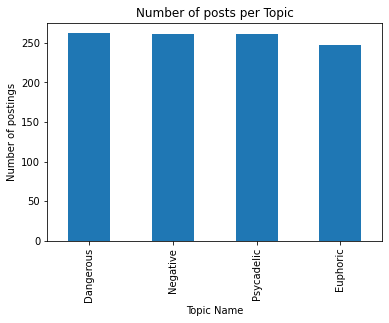

In [32]:
import matplotlib.pyplot as plt
combined_df['effect'].value_counts().plot.bar(x=None, y=None)
plt.title('Number of posts per Topic')
plt.xlabel('Topic Name')
plt.ylabel('Number of postings')

In [33]:
combined_df = combined_df.drop(['counter', 'general_words_removed','drugsremoved','index'], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
all_drugs = []
for i in combined_df.drug_terms:
    if i != '':
        if i[:-1] == 's'
            
            i
            i = i.split()
            for i in i:
                all_drugs.append(i)

In [87]:
all_drugs_df = pd.DataFrame(all_drugs)
all_drugs_df.value_counts().head(10)

benzos         130
benzo          105
mdma            99
etizolam        91
dmt             70
ketamine        69
kratom          54
clonazolam      51
dck             50
amphetamine     46
dtype: int64

In [64]:
mask1 = (combined_df['effect'] == 'Dangerous') & (combined_df['drug_terms'] != '')
mask2 = (combined_df['effect'] == 'Negative') & (combined_df['drug_terms'] != '')
mask3 = (combined_df['effect'] == 'Psycadelic') & (combined_df['drug_terms'] != '')
mask4 = (combined_df['effect'] == 'Euphoric') & (combined_df['drug_terms'] != '')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
dangerous = combined_df[mask1]
negative = combined_df[mask2]
psycadelic = combined_df[mask3]
euphoric = combined_df[mask4]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
dangerous_drugs = []
for i in dangerous.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            dangerous_drugs.append(i)
            
negative_drugs = []
for i in negative.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            negative_drugs.append(i)
            
psycadelic_drugs = []
for i in psycadelic.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            psycadelic_drugs.append(i)
            
euphoric_drugs = []
for i in euphoric.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            euphoric_drugs.append(i)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
dangerous_df = pd.DataFrame(dangerous_drugs)
negative_df = pd.DataFrame(negative_drugs)
psycadelic_df = pd.DataFrame(psycadelic_drugs)
euphoric_df = pd.DataFrame(euphoric_drugs)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
dangerous_df.value_counts().head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


benzos        41
benzo         31
etizolam      30
ketamine      30
mdma          22
clonazolam    21
etiz          15
dmt           14
dck           14
kratom        13
dtype: int64

In [75]:
negative_df.value_counts().head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


benzos         31
mdma           25
benzo          25
mapb           18
amphetamine    17
etizolam       15
kratom         15
meth           14
dck            13
coke           13
dtype: int64

In [76]:
psycadelic_df.value_counts().head(10)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


benzos        49
benzo         35
etizolam      33
kratom        20
meth          19
mdma          18
clonazolam    16
etiz          14
ketamine      13
gram          12
dtype: int64

In [77]:
euphoric_df.value_counts().head(10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dmt            35
mdma           34
dopamine       18
ketamine       18
benzo          14
etizolam       13
tryptamine     12
dck            12
amphetamine    12
adderall        9
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='0'>

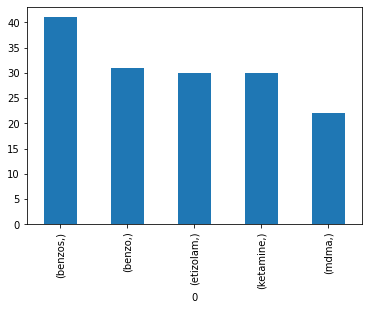

In [79]:
dangerous_df.value_counts().head(5).plot.bar()


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


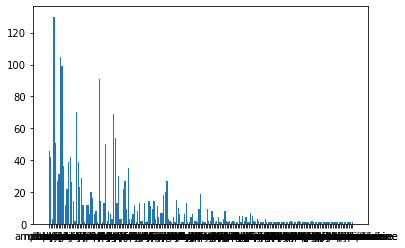

In [51]:
import matplotlib.pyplot as plt
from collections import Counter
# Use a Counter to count the number of instances in x
c = Counter(dangerous_drugs)

plt.bar(c.keys(), c.values())
plt.show()

In [42]:
df = data

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
tweet_word_matrix = tf_vectorizer.fit_transform(data.drugsremoved)
vocab = tf_vectorizer.get_feature_names()


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#nmf = NMF(n_components=5)

lda_tf.fit(tweet_word_matrix)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4, random_state=0)

In [45]:
tweet_topic_matrix = lda_tf.transform(tweet_word_matrix)

tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')

tweet_topic_matrix_df['text'] = data['text']
tweet_topic_matrix_df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_0,topic_1,topic_2,topic_3,text
0,0.006414,0.980555,0.006506,0.006524,took one tab of it at am and felt the firs...
1,0.006414,0.980555,0.006506,0.006524,took one tab at am and felt the first effe...
2,0.173452,0.301150,0.519896,0.005502,so my brain was virgin and i used both and ...
3,0.026557,0.376049,0.026407,0.570987,amp \n\noptical brightening agents obas ...
4,0.018923,0.018109,0.021275,0.941693,i’ve fucked around with pressed bars for quite...


In [46]:
word_topic_matrix_df = pd.DataFrame(lda_tf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_0,topic_1,topic_2,topic_3
abnorm,4.511528,0.440464,0.323990,3.724018
abort,0.982229,1.776828,0.257854,3.983089
absolut,28.882945,12.687082,4.949794,37.480179
absorb,0.286950,2.788653,3.977315,3.947083
abyss,0.250012,0.266783,9.233196,0.250010


In [47]:
def top_tweets(tweet_topic_matrix_df, topic, n_tweets):
    return (tweet_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_tweets)['text']
            .values)

def top_words(word_topic_matrix_df, topic, n_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
for text in top_tweets(tweet_topic_matrix_df, 'topic_3', 15):
    print(text)
    print()

warning  long thematic intro ahead  skip to trip report to get to nitty gritty  otherwise  enjoy  learn  and do not replicate  there were both good and bad lessons  

this is entirely true  not fabricated or embellished in any way  

intro 

friends  enemies  psychonauts  laymen  poor souls lost in r rc  and everything in between  i have seen what lies beyond and it is terrifyingly beautiful  haunting  and the sum of our fears  i say with    certainty that no scholar  messiah  street preacher  actor playing jesus being whipped  or raving lunatic has gotten it right  

until now 

forget your crusty books  your golden bibles  your totally not allowed secret nude statues of the well endowed muslim holy men of mecca  and hundreds of roman god s with chistled small penis having bodies  and the voluptuous cave statues of bbw women cavemen carried out  we are our own god  

the god of life  death  happiness  despair  joy  and the eternal pumping lurching lumbering heaving till your completel

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(drug_terms)

In [ ]:
len(big_drug_corpus)